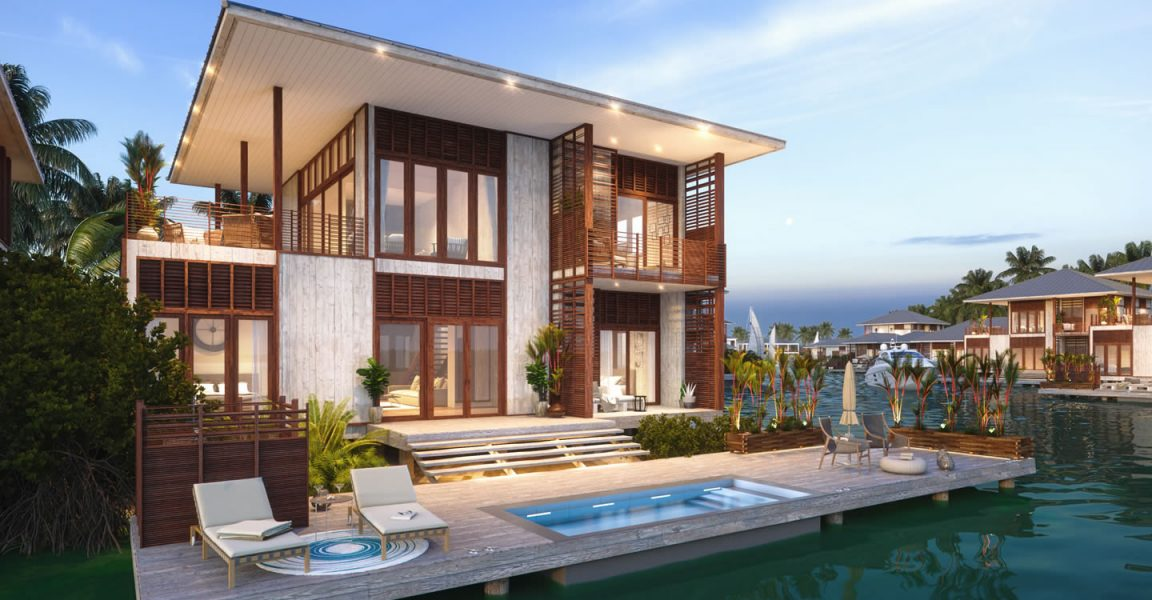

# Business Problem
______________________________________________________________________________________________________________________________

King County Realty is a newly established local business in Northwestern America. They are seeking some information regarding what attracts local buyers in this area to purchase new homes. We will inspect the data set to determine what relationships and connections buyers have to purchasing a home and help King County Realty market their new business to suit.

A linear regression model will be used to understand the connections to the business problem usingthe OSMIN Model a our Data Science Process.

Step 1: Read the dataset and inspect its columns and 5-point statistics¶

In [1]:
#Import packages
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy import stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import random
from math import sqrt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
#Import data set
data = pd.read_csv('data\\kc_house_data.csv')

In [3]:
#view size of dataset
data.shape

(21597, 21)

In [4]:
#obtain stats details
data.describe

<bound method NDFrame.describe of                id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view

In [5]:
#Review correlations across all dataset variables
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [6]:
#discover unique values
data.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [7]:
#move null values 
data.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [8]:
#review data types 
data.info

<bound method DataFrame.info of                id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  

In [9]:
#drop unnecessary column data
data.drop(['id', 'date', 'waterfront', 'sqft_above', 'sqft_basement', 'lat', 'long', 'view', 'bedrooms', 'bathrooms', 'sqft_living15', 'sqft_lot15', 'yr_renovated', 'zipcode', 'condition', 'floors', 'yr_built'], axis=1, inplace=True)

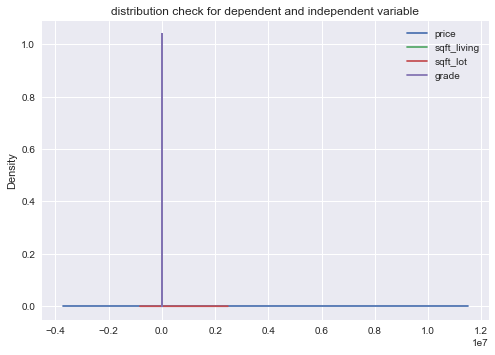

In [10]:
#kernal density plot estimation and distro check
data.plot.kde()
plt.title("distribution check for dependent and independent variable")
plt.show()

In [11]:
#Review specific correlated value estimated
data.corr()

,price,sqft_living,sqft_lot,grade
price,1.000000,0.701917,0.089876,0.667951
sqft_living,0.701917,1.000000,0.173453,0.762779
sqft_lot,0.089876,0.173453,1.000000,0.114731
grade,0.667951,0.762779,0.114731,1.000000


In [12]:
#view customised dataframe 
data.head()

,price,sqft_living,sqft_lot,grade
0,221900.0,1180,5650,7
1,538000.0,2570,7242,7
2,180000.0,770,10000,6
3,604000.0,1960,5000,7
4,510000.0,1680,8080,8


Describe Dataset: The data is comprised of 21597 rows and 21 columns. Above you will see a data frame that is free from null values and is ready for further analysis. I have nominated to keep the price, sqft_living, sqft_lot and grade to peform his analyis. Sqft_living and sqft_lot are about teh siz of lilving room and the size of the lot itself. The grade is a special score that is given from the King County regarding the overall condition of the house such as an evaluation. The outliers have been left in the data and will likely skew or change the best line of fit. However we have opted to keep them in for the sake of obtaining actual detail. 

Step 2: Plot histograms with KDE Kernal Density Estimation overlay to check the distribution of the predictors

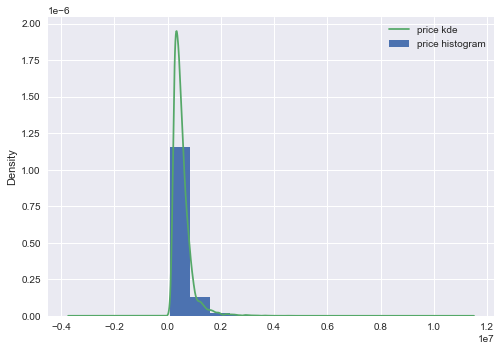

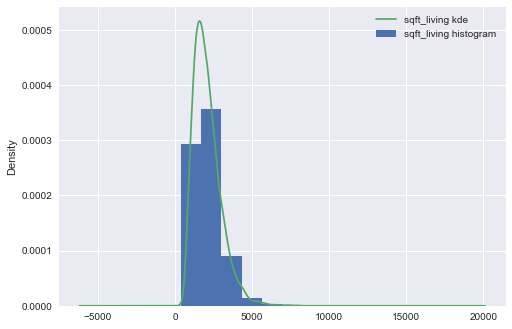

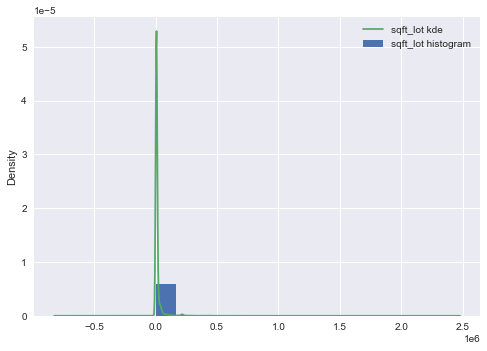

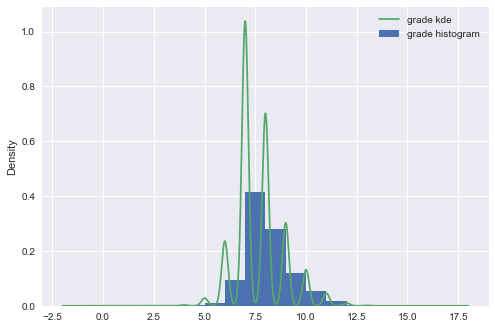

In [13]:
# For all the variables, check distribution by creating a histogram with kde
for column in data:
    data[column].plot.hist(density=True, label = column+' histogram')
    data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

Descriptive Observations:  The closest normal pattern that I can see is related to the sqft_living and the grade. You will notice with the green line slope how it doesnt closely match the actual blue blocked histogram values from the dataset. I will pursue these two values in this regression model further.  

Step 3: Test for the linearity assumption

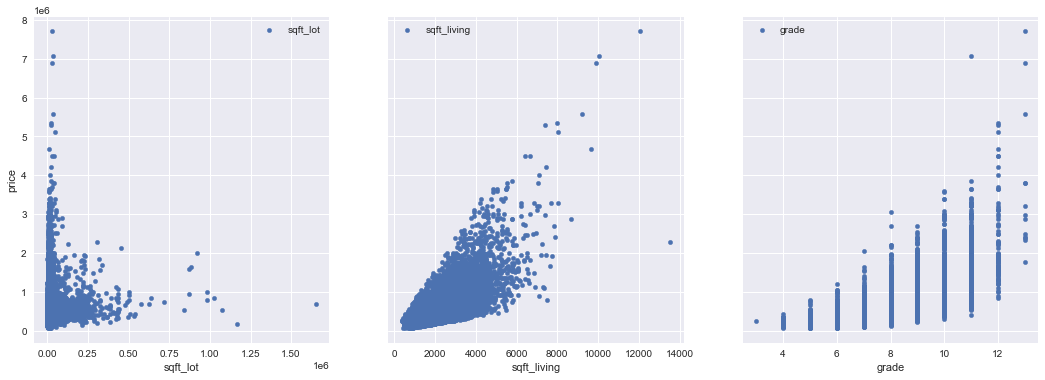

In [14]:
# visualize the relationship between the preditors and the target using scatterplots

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_lot', 'sqft_living', 'grade']):
    data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

Descriptive Observations: As visualised in the KDE, the closest forms of linearity show in sqft_living verses the sqft_lot. Also the grade shows a strong discrete, yet categorical connection with a gradua increase aso depicting a possible linearity. 

Step 4: Run a simple regression in Statsmodels with 'sqft_lot' as a predictor

In [15]:
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf

# build the formula 
f = 'price~sqft_lot'
# create a fitted model in one line
model = smf.ols(formula=f, data=data).fit()

Step 5: Get Regression Diagnostics Summary

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     175.9
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           5.57e-40
Time:                        18:09:28   Log-Likelihood:            -3.0730e+05
No. Observations:               21597   AIC:                         6.146e+05
Df Residuals:                   21595   BIC:                         6.146e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.283e+05   2650.075    199.337      0.000    5.23e+05    5.33e+05
sqft_lot       0.7973      0.060     13.261      0.000       0.679       0.915
==============================================================================
Omnibus:                    19136.153   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1147708.008
Skew:                           4.030   Prob(JB):                         0.00
Kurtosis:                      37.792   Cond. No.                     4.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Descriptive Observations here: The R squared value (Pearson correlaon coefficient squared) is .493 and is indicative that this is not a very strong correlation. However as the notes above specify, it may indicate that there is strong multicollinearity. We will review further ahead. 

Step 6: Draw a prediction line with data points on a scatter plot for X (sqft_living) and Y (Price)

C:\Users\racar\AppData\Local\Temp/ipykernel_7796/3906308399.py:3: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


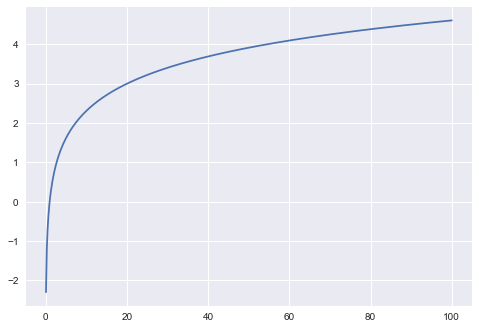

In [17]:
#Log trandsformation visual representation 
x = np.linspace(start=-100, stop=100, num=10**3)
y = np.log(x)
plt.plot(x, y);

   sqft_lot
0       520
1   1651359
0    5.286726e+05
1    1.844861e+06
dtype: float64


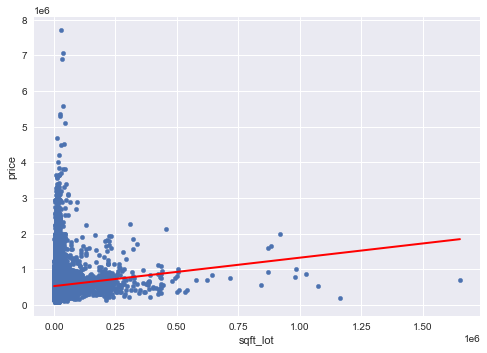

In [18]:
# create a DataFrame with the minimum and maximum values of swft_living
# make predictions for those x values and store them
# first, plot the observed data and the least squares line
# create a DataFrame with the minimum and maximum values of Sqft_living

X_new = pd.DataFrame({'sqft_lot': [data.sqft_lot.min(), data.sqft_lot.max()]})
print(X_new.head())

# make predictions for those x values and store them
preds = model.predict(X_new)
print (preds)

# first, plot the observed data and the least squares line
data.plot(kind='scatter', x='sqft_lot', y='price')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

Decriptive Observations: I can see that there is a strong linear regression here to begin with. The red line mapping the continuous correlation is not in alignment with the data across the span of pricing data.  

Step 7: Visualize the error term for variance and heteroscedasticity

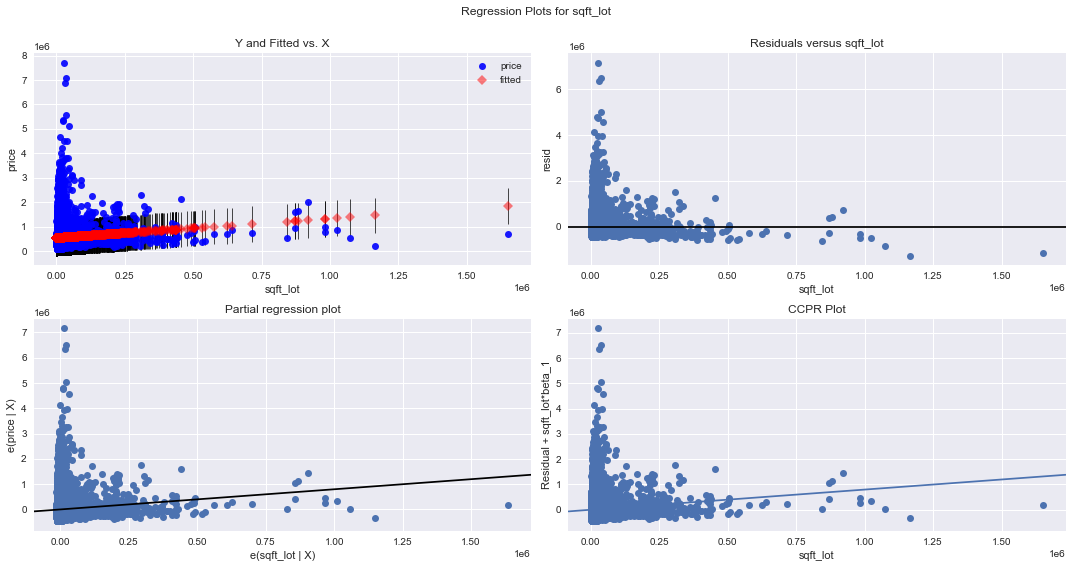

In [19]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
plt.show()

 Record Your observations on heteroscedasticity

 From the first and second plot in the first row, we see a cone-shape which is a sign of heteroscedasticity. 
 Ideally we are looking for homodsacticity where the scatter plot is distributed across the best line of fit. The visualisation below from the QQ Plot confirms that the best line of fit drops off after some time and does not remain continuous. Determining that sqft_livig starts to as a strong cnnection however is not consistent with this dataset.  

Step 8: Check the normality assumptions by creating a QQ-plot

C:\Users\racar\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


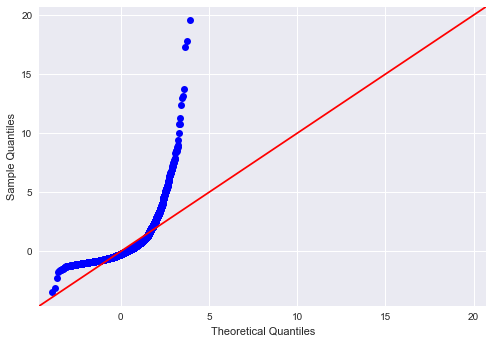

In [20]:
# Code for QQ-plot here
import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

Step 9: Repeating the above for grade 

R-Squared: 0.44615823299735036
Intercept   -1.061416e+06
grade        2.091578e+05
dtype: float64


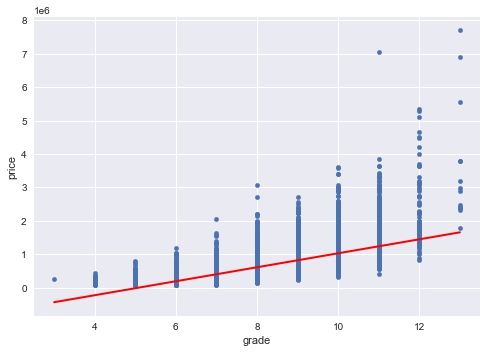

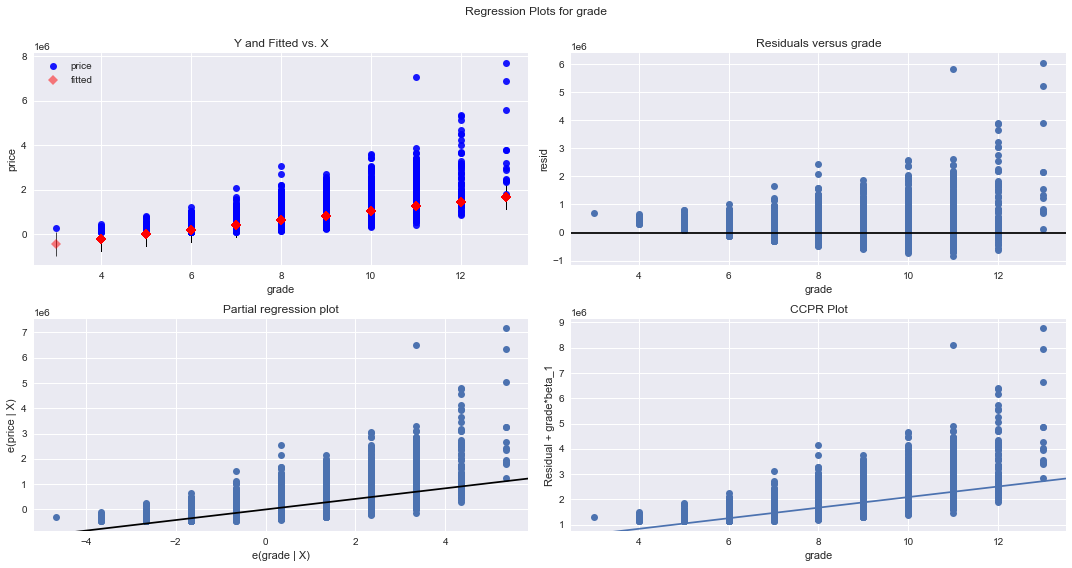

C:\Users\racar\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


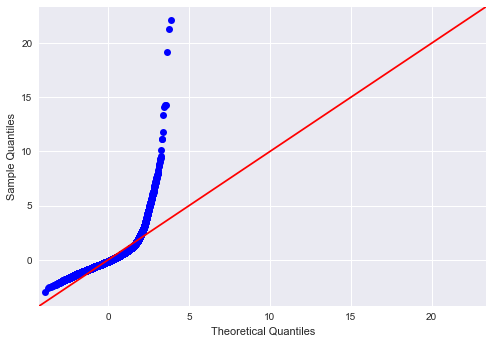

In [21]:
# code for model, prediction line plot, heteroscedasticity check and QQ normality check here
f = 'price~grade'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'grade': [data.grade.min(), data.grade.max()]});
preds = model.predict(X_new)
data.plot(kind='scatter', x='grade', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "grade", fig=fig)
plt.show()
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

Descriptive Observations: Here we can see that grade also has a strong best fit to start, however does not maintain continuously to gradually increase with the red line or best line of fit, as determined in the QQ plot above.

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Mon, 06 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:09:32   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Descriptive Observation: The grade OLS R squared value has slightly decreased, indicating that this is even less of a correlation or is less favourable with a connection to the house sales price. 

Advise of the final analysis

(2) Two features that have strong relationships with housing prices:

Sqft_living had the strongest linearity compared to sqft_lot which would be a resaonably strong connection to house sales in the area. For example, the larger the lot the higher the price. This theory proved to be incorrect. The larger the sqft_living area was directly correlated with the increased house sales price, but to a certain point. I believe that the outliers played a certain part in this analysis, and I debated to remove teh outliers from this test. However, I felt that the data should remain in this dataset to ensure transparency and depict a true accurate model. 

In Summary this dataset was very interesting.

First steps performed was leaning and prepping data to take a deeper dive in the data set. Through a correlation analysis we could see that the strongest correlations were amongst the sqft_living, grade, and sqft_lot. 

When compared to other variables found that the grade which also had a close level of correlation also diplayed a level of gradual increase over time. Meaning that the quality or grade of the home, also correlated to the increase of the sale price.However through further analysis we determined that this was only so to a point. 

I have determined that the sqft_living does not affect the amount of sales or increase of house sales price King County area in the presence of high outliers. It shows a strong correlation, definately not causation. The steps modelled in this notebook replicated for the continuous variables measured which were sqft_living, sqft_lot and grade (whch appeared to be both categorical and continuous based on the data visualisations observed). 
When we further compared this knowledge after researching some websites on how sqft_lot size impacts the sales of house, we found that the connection was very low.

In summary, I am stating there are many determining factors as to why a person purchases a home, perhaps it is the way they feel on that day, that the house is positioned in an area that makes them feel something special, or that they like to be closer to schools and shops for instance. This data is outside the scope of the data set however would have surprising insights to extract and report on. However sqft_living with the strongest correlation, has a low chance of affecting the buyer as a strong influenmcer to purchase a home. 

3 important parameter estimates or statistics found through the data

Sqft_living R squared value square = 0.493
Grade OLS R squared value = 0.446


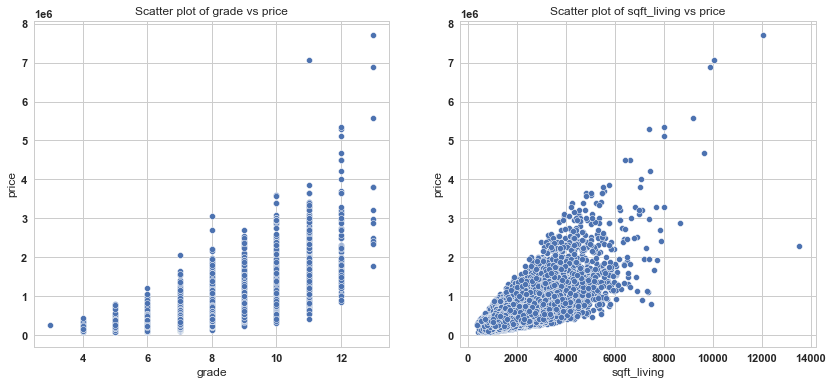

In [23]:
#Compare linearity between 2 variables for further analysis without exaggerating multicolinearity
sns.set_theme(color_codes=True)
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')
data = pd.read_csv('data\\kc_house_data.csv')
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='grade',y='price',data=data,palette='Set1',ax=ax)
ax.set_title('Scatter plot of grade vs price')

ax = f.add_subplot(122)
sns.scatterplot(x='sqft_living',y='price',data=data,palette='viridis')
ax.set_title('Scatter plot of sqft_living vs price')
plt.savefig('sc.png');

In [34]:
#Show current types, convert to integers as all numerical values, display data 
print(data.dtypes)
data = data.astype("int64", errors='ignore')
data.info()

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  


In [35]:
data_preds = data.drop('price', axis=1)
data_target = data['price']
data_preds.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,3,1,1180,5650,1,NaN,0,3,7,1180,0.0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,3,2.25,2570,7242,2,0,0,3,7,2170,400.0,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,2,1,770,10000,1,0,0,3,6,770,0.0,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,4,3,1960,5000,1,0,0,5,7,1050,910.0,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,3,2,1680,8080,1,0,0,3,8,1680,0.0,1987,0,98074,47.62,-122.05,1800,7503


In [36]:
#use sm,add_constant() to add constant term/y-intercept
predictors = sm.add_constant(data_preds)
predictors
#optimise betas adding another predictor intercept term = bo x const

C:\Users\racar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,7129300520,10/13/2014,3,1,1180,5650,1,NaN,0,...,7,1180,0.0,1955,0,98178,47.51,-122.26,1340,5650
1,1,6414100192,12/9/2014,3,2.25,2570,7242,2,0,0,...,7,2170,400.0,1951,1991,98125,47.72,-122.32,1690,7639
2,1,5631500400,2/25/2015,2,1,770,10000,1,0,0,...,6,770,0.0,1933,NaN,98028,47.74,-122.23,2720,8062
3,1,2487200875,12/9/2014,4,3,1960,5000,1,0,0,...,7,1050,910.0,1965,0,98136,47.52,-122.39,1360,5000
4,1,1954400510,2/18/2015,3,2,1680,8080,1,0,0,...,8,1680,0.0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1,263000018,5/21/2014,3,2.50,1530,1131,3,0,0,...,8,1530,0.0,2009,0,98103,47.70,-122.35,1530,1509
21593,1,6600060120,2/23/2015,4,2.50,2310,5813,2,0,0,...,8,2310,0.0,2014,0,98146,47.51,-122.36,1830,7200
21594,1,1523300141,6/23/2014,2,0.75,1020,1350,2,0,0,...,7,1020,0.0,2009,0,98144,47.59,-122.30,1020,2007
21595,1,291310100,1/16/2015,3,2.50,1600,2388,2,NaN,0,...,8,1600,0.0,2004,0,98027,47.53,-122.07,1410,1287


In [37]:
data_preds_scaled = (data_preds - np.mean(data_preds)) /np.std(data_preds)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
data_preds_scaled.describe()

C:\Users\racar\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\racar\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3558: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,bathrooms,bedrooms,condition,floors,grade,id,lat,long,sqft_above,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
count,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21534,19221,21597,17755,21597
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.10,-2.56,-3.70,-0.92,-3.97,-1.59,-2.92,-2.17,-1.71,-1.86,-2.32,-0.35,-0.44,-0.31,-0.09,-2.42,-0.21,-1.44
25%,-0.48,-0.40,-0.63,-0.92,-0.56,-0.85,-0.64,-0.81,-0.72,-0.71,-0.72,-0.24,-0.28,-0.31,-0.09,-0.68,-0.21,-0.84
50%,0.17,-0.40,-0.63,0.01,-0.56,-0.23,0.08,-0.12,-0.28,-0.19,-0.21,-0.18,-0.19,-0.31,-0.09,0.14,-0.21,-0.24
75%,0.50,0.68,0.91,0.94,0.29,0.95,0.85,0.63,0.51,0.51,0.54,-0.11,-0.10,-0.31,-0.09,0.89,-0.21,0.75
max,7.65,31.98,2.44,3.72,4.55,1.85,1.57,6.39,9.21,12.48,6.16,39.51,31.47,4.92,11.43,1.50,4.83,2.26


In [32]:
data_preds_scaled.describe()

,bathrooms,bedrooms,condition,floors,grade,id,lat,long,sqft_above,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
count,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597,21534,19221,21597,17755,21597
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.10,-2.56,-3.70,-0.92,-3.97,-1.59,-2.92,-2.17,-1.71,-1.86,-2.32,-0.35,-0.44,-0.31,-0.09,-2.42,-0.21,-1.44
25%,-0.48,-0.40,-0.63,-0.92,-0.56,-0.85,-0.64,-0.81,-0.72,-0.71,-0.72,-0.24,-0.28,-0.31,-0.09,-0.68,-0.21,-0.84
50%,0.17,-0.40,-0.63,0.01,-0.56,-0.23,0.08,-0.12,-0.28,-0.19,-0.21,-0.18,-0.19,-0.31,-0.09,0.14,-0.21,-0.24
75%,0.50,0.68,0.91,0.94,0.29,0.95,0.85,0.63,0.51,0.51,0.54,-0.11,-0.10,-0.31,-0.09,0.89,-0.21,0.75
max,7.65,31.98,2.44,3.72,4.55,1.85,1.57,6.39,9.21,12.48,6.16,39.51,31.47,4.92,11.43,1.50,4.83,2.26


In [33]:
#Transforming dataset 
ss = StandardScaler()
ss.fit(data_preds)
data_preds_st_scaled = ss.transform(data_preds_scaled)

ValueError: could not convert string to float: '10/13/2014'

In [ ]:
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)